<a href="https://colab.research.google.com/github/rupeshvalupadasu/IntroToML-NN_Dec23/blob/main/Notes_1_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CONTENT


---
- Case Study Introduction
- What is dimensionality reduction ?

- Eigen Values and vectors
  - Hands on : Eigen value and vectors

- PCA
  - Maximum Variance formulation
  - Maths behind Maximum Variance formulation

- Points to remember
- Code implementation
  - Steps of implementation

- Summary of PCA



###Case Study Intro
---

####Introduction to the MNIST Dataset:
- MNIST dataset: it's a classic dataset in machine learning, consisting of 28x28 grayscale images of handwritten digits (0 through 9).

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/741/original/mnis.png?1712665123" width = 600>

- Every MNIST data point, every image, can be thought of as an array of numbers describing how dark each pixel is. For example, we might think of 1 as something like:

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/742/original/one.png?1712665242" width = 600>

- Since each image has 28 by 28 pixels, we get a 28x28 array. We can flatten each array into a 28∗28=784 dimensional vector. Each component of the vector is a value between zero and one describing the intensity of the pixel. Thus, we generally think of MNIST as being a collection of 784-dimensional vectors.


#### Load the MNIST


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!gdown 1UZNOcb-bSL-aPPXWcPH4h4Kbx4G-bk9J

Downloading...
From: https://drive.google.com/uc?id=1UZNOcb-bSL-aPPXWcPH4h4Kbx4G-bk9J
To: /content/mnist_train.csv
100% 76.8M/76.8M [00:00<00:00, 109MB/s]


In [ ]:
d0 = pd.read_csv('mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [ ]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


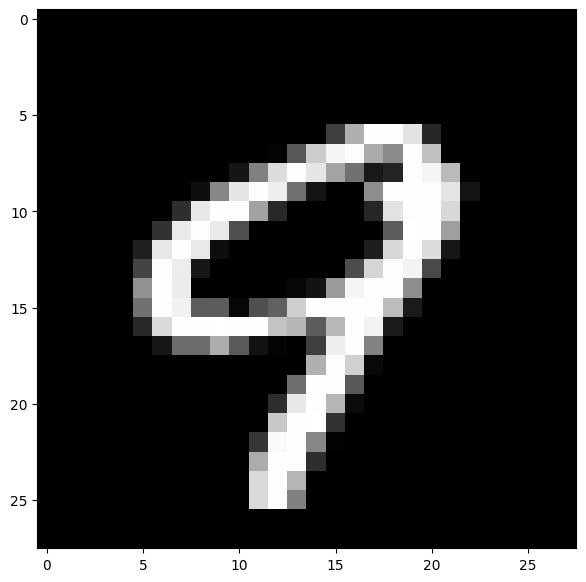

9


In [ ]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].values.reshape(28, 28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

## Dimentionality Reduction
---

#### What is dimensionality reduction ?

- Imagine you're organizing a party and you want to take a group photo with all your friends. But there's a problem: the photo booth is tiny! It can only fit people in a two-dimensional space, like a flat picture.

- Unfortunately, your friends exist in a three-dimensional world (height, width, and depth). So, how do you capture all your friends in the two-dimensional photo?

- Dimensionality reduction is like squeezing your 3D world into a 2D photo. You lose some information, like how far out someone is standing, but you still capture the important stuff: who's at the party!

Here's how it works in data science:

- Imagine your data is a group of friends. Each friend has many features, like height, hair color, and shoe size (these are dimensions).
You want to understand the data better, but having too many features can be cumbersome.

- Dimensionality reduction techniques are like taking a photo of your friends.
- They reduce the number of features (dimensions) while trying to keep the important information that helps understand the data.

#### Why dimensionality redution ?
- There are two main reasons why dimensionality reduction is important:

  - `The Curse of Dimensionality`: As the number of features increases, it can become exponentially harder for machine learning algorithms to learn effectively. This is known as the curse of dimensionality. By reducing dimensions, we can alleviate this problem and improve the performance of our models.

  - `Data Visualization and Interpretation`:  High-dimensional data is difficult to visualize or understand directly. Dimensionality reduction techniques can project the data onto a lower-dimensional space, allowing us to visualize and interpret the data more easily. This can help us identify patterns and relationships between features that might be hidden in the original high-dimensional space.

## Eigen Values and Eigen Vectors
---

- Let their be a coloumn vector X and matrix A as given below :


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/116/original/qw.png?1712220183" width = 600>

- Multiply the matrix A with column vector A

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/118/original/ty.png?1712220371" width = 600>


- Calculate the resultant matrix
- If we take 10 common from the resultant matrix, then A.X = 10 X
- Now in general terms, can we say A.X = $λ$.X
- This is where the idea of Eigen vector comes into picture.

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/119/original/ee.png?1712220492" width = 600>




Mathematicaly,
- Let A be a nxn non-zero vector and if A.X = $λ$.X, then we say X is Eigen vector of A and $λ$ is the Eigen value of the corrosponding Eigen vector.

- Let's derive a small formula which help us in determining eigen vector and eigen value
- We are taking determinant on both sides. Since X is a non-zero vector, so removing it from the eqn.
- I--> here is the identity matrix.
- We will use this final eqn to find eigen value and eigen vector.

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/127/original/yy.png?1712222054" width = 600>

## Hands on : Eigen value and vector
---

- Using the formula we derived, let's find out eigen values and eigen vector.
- let's first calculate eigen values for the matrix A.

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/362/original/eq.png?1712298907" width = 600>

- Using the eigen values that we found out, we would use them find our eigen vectors.


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/368/original/u.png?1712300979" width = 600>

- The calculation part has been simplified from the mid steps

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/369/original/rt.png?1712301681" width = 600>


- Now try and calculate the other eigen vector using the other value of λ = -3

## PCA: Principle componenet Analysis
---

- Some of the things that PCA helps in are
  - Dimenionaliity Reduction
  - Lossy data compression
  - Feature Extraction
  - Visulization

- There two methods which define PCA
  1. Maximum Varinace formulation
  2. Minimum Error formulation

### Maximum Variance formulation
---

- If we want to project my datapoints on x- axis. Let's call the projection as b.
- So do you think there will be any loss of data from a to b after projection ?



<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/376/original/pro.png?1712304676" width = 600>


- it you closely above the two pink data points, they are on the same line. So when we project them at b. They will overlapped.

- That means after projection we will see the loss of our data.

- What if we project the same data on Y -axis, will there be any difference in the loss of data?

- The loss will be similar to that of x-axis.




<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/377/original/pin.png?1712305053" width = 600>

- What will be the loss on y axis in comparision to x-axis on this data ?
  - the loss on y axis will be more,because there will be more overlapping.
  - If we observe the x-axis, the data seems to more spread(variance) than in y axis.


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/382/original/new_data.png?1712306351" width = 600>

- Now what if we rotate the axis ?
  - By rotating new axis we can see that the maximum variance/spread of data can be captured.

- So this becomes our direction which has the maximum variance and this the goal of PCA to find such direction.


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/586/original/cht.png?1712560000" width = 600>

#### Mathmatics behind Maximum Variance formulation
---

- Let's I have a dataset X_n
- The cureent dimentionality of our data is D
- The target dimension is M < D


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/587/original/qwv.png?1712562151" width = 600>

- The idea is to find the direction where we can find maximum variance
- Let say M = 1
- To find such direction we are going to consider a unit vector in a random direction
- Then we are going to project our data points on to that vector

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/589/original/jk.png?1712563070" width = 600>

- The next step is to find the variance in the direction of u1 vector
- But before that let's see our mean in u1 direction
- Once we have our mean just plug it in the varinace formula

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/591/original/ty.png?1712563827" width = 600>


- The variance can be written in the other format as well.
- Here S is nothing but your covariance matrix.

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/593/original/56.png?1712566838" width = 600>


- The constraint here is that u is unit vector as mentioned below.
- Now using Lagrange multiplier, we can write objective function as:

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/596/original/13.png?1712568488" width = 600>

- Using derivative chart we would equate our eqn to zero to optimize it

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/597/original/78.png?1712569204" width = 600>


- By derivating and equating it to zero we got the eqn in A.X= $\lambda$.X format

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/599/original/1we.png?1712569479" width = 600>


## Points to remember:
---


- Depending on the eigen value, we can decide what eigen vector to choose for the projection
- Larger the eigen value corresponds to larger variance that means eigen vector for that eigen value will preserve the maximum information.
  - **Example**: If we want to reduce dimentionality from 10 to 2, we would chose the top 2 eigen value(magnitude) which will give us the eigen vector which maximize the variance.

## Code Implementation
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
from sklearn import datasets

digits = datasets.load_digits()

X=digits.data
print(X.shape)

(1797, 64)


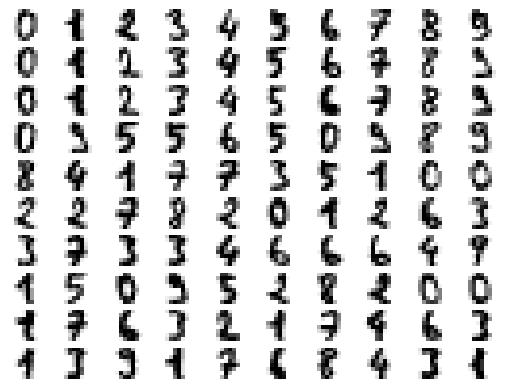

In [ ]:
import matplotlib.pyplot as plt

plt.set_cmap('binary') # set the colourmap to grayscale white to black

for i in range(10):
  for j in range(10):
   ax = plt.subplot(10,10,1+10*i+j)
   ax.axis('off')
   ax.matshow(digits.images[10*i+j])

plt.show()
plt.close()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X_stand = scaler.transform(X)

In [ ]:
pca = PCA(n_components = 2)

X_embedded = pca.fit_transform(X_stand)


print(X_embedded.shape)

(1797, 2)


<Figure size 640x480 with 0 Axes>

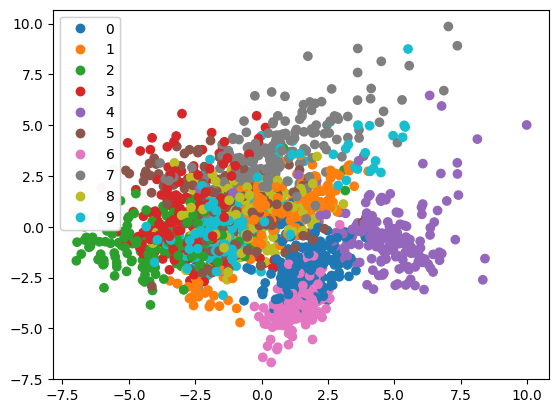

In [ ]:
plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1],c=digits.target)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

## Summary of PCA
---

`What is PCA used for?`

The algorithm can be used on its own, or it can serve as a data cleaning or data preprocessing technique used before another machine learning algorithm.

On its own, PCA is used across a variety of use cases:

1. Visualize multidimensional data. Data visualizations are a great tool for communicating multidimensional data as 2- or 3-dimensional plots.

2. Compress information. Principal Component Analysis is used to compress information to store and transmit data more efficiently. For example, it can be used to compress images without losing too much quality, or in signal processing. The technique has successfully been applied across a wide range of compression problems in pattern recognition (specifically face recognition), image recognition, and more.

3. Simplify complex business decisions. PCA has been employed to simplify traditionally complex business decisions. For example, traders use over 300 financial instruments to manage portfolios. The algorithm has proven successful in the risk management of interest rate derivative portfolios, lowering the number of financial instruments from more than 300 to just 3-4 principal components.

4. Clarify convoluted scientific processes. The algorithm has been applied extensively in the understanding of convoluted and multidirectional factors, which increase the probability of neural ensembles to trigger action potentials.

When PCA is used as part of preprocessing, the algorithm is applied to:

1. Reduce the number of dimensions in the training dataset.
2. De-noise the data. Because PCA is computed by finding the components which explain the greatest amount of variance, it captures the signal in the data and omits the noise.



`Advantages of PCA:`

1. Easy to compute. PCA is based on linear algebra, which is computationally easy to solve by computers.

2. Speeds up other machine learning algorithms. Machine learning algorithms converge faster when trained on principal components instead of the original dataset.

3. Counteracts the issues of high-dimensional data. High-dimensional data causes regression-based algorithms to overfit easily. By using PCA beforehand to lower the dimensions of the training dataset, we prevent the predictive algorithms from overfitting.


`Disadvantages of PCA:`

1. Low interpretability of principal components. Principal components are linear combinations of the features from the original data, but they are not as easy to interpret. For example, it is difficult to tell which are the most important features in the dataset after computing principal components.

**`What are the assumptions and limitations of PCA?`**

PCA is related to the set of operations in the Pearson correlation, so it inherits similar assumptions and limitations:

1. PCA assumes a correlation between features. If the features (or dimensions or columns, in tabular data) are not correlated, PCA will be unable to determine principal components.
2. PCA is sensitive to the scale of the features. Imagine we have two features - one takes values between 0 and 1000, while the other takes values between 0 and 1. PCA will be extremely biased towards the first feature being the first principle component, regardless of the actual maximum variance within the data. This is why it’s so important to standardize the values first.

3. PCA is not robust against outliers. Similar to the point above, the algorithm will be biased in datasets with strong outliers. This is why it is recommended to remove outliers before performing PCA.

4. PCA assumes a linear relationship between features. The algorithm is not well suited to capturing non-linear relationships. That’s why it’s advised to turn non-linear features or relationships between features into linear, using the standard methods such as log transforms.

5. Technical implementations often assume no missing values. When computing PCA using statistical software tools, they often assume that the feature set has no missing values (no empty rows). Be sure to remove those rows and/or columns with missing values, or impute missing values with a close approximation (e.g. the mean of the column).